In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from numpy.linalg import inv

## Import modules from parent and multimode expts

In [3]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
data_parent_path = r'h:\Shared drives\SLab\Multimode\experiment\240911'
print("Data Parent Path:", data_parent_path)
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Data Parent Path: h:\Shared drives\SLab\Multimode\experiment\240911
Parent Path: c:\_Lib\python\multimode_expts


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [5]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# config

In [7]:
curr_path = os.getcwd()
config_file = expts_path+'\\config_rfsoc_ziqian.yml'
config_path = config_file
print('Config will be', config_path)


Config will be C:\_Lib\python\multimode_expts\config_rfsoc_ziqian.yml


In [8]:
qubit_i = 0
import yaml
with open(config_file, 'r') as cfg_file:
    yaml_cfg = yaml.safe_load(cfg_file)
yaml_cfg = AttrDict(yaml_cfg)

# Exp path

In [9]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs
data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data


# Create a dataset

In [15]:
file_lists = [[ 66,  67,  68,  69,  70,  71,  72],
       [108, 109, 110, 111, 112, 113, 114],
       [ 73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86],
       [ 87,  88,  89,  90,  91,  92,  93],
       [ 94,  95,  96,  97,  98,  99, 100],
       [101, 102, 103, 104, 105, 106, 107]]
orig_idxs = [ 0,  1,  2,  3,  4,  5,  6]



Processing mode 1 with original index 0
00066_cross_kerr_sweep.h5
Attempted to init fitparam 4 to -2.14604920733323, which is out of bounds 14.41190542181396 to 16.816650641447804. Instead init to 15.614278031630882
Attempted to init fitparam 4 to 15.614278031630882, which is out of bounds 16.45469164513448 to 22.521597649782407. Instead init to 19.488144647458444
Current pi pulse frequency: 4984.02431625832
Fit frequency from I [MHz]: 0.022918298142955634 +/- 2.1964698329110824e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.051397960177
 	4984.097234556463
T2 Ramsey from fit I [us]: 252.13014275384742
Fit frequency from Q [MHz]: 0.023120935796666058 +/- 0.00017281156511449078
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.051195322523
 	4984.0974371941165
T2 Ramsey from fit Q [us]: 166.48769225600276
00067_cross_kerr_sweep.h5
Attempted to init fitparam 4 to 19.488144647458444, which is out of bounds -12.198473861164215 to 9.204853564802546. Instead init to 

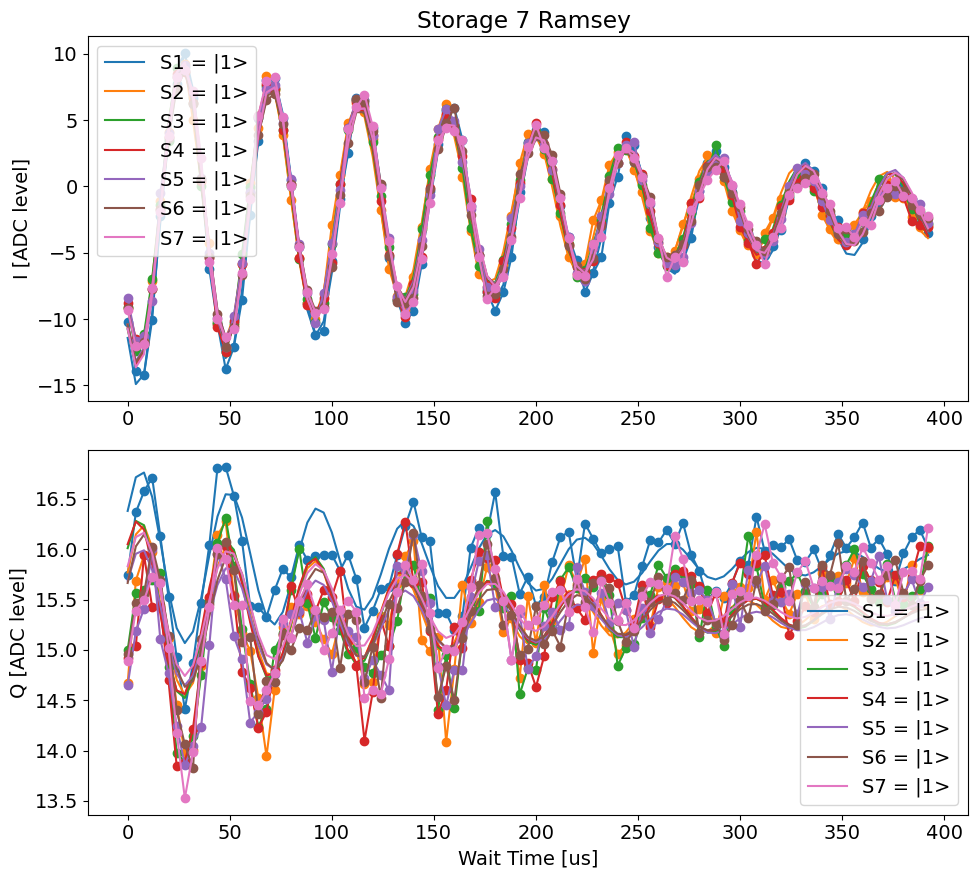

Processing mode 2 with original index 1
00108_cross_kerr_sweep.h5
Attempted to init fitparam 4 to -5.037922531323066, which is out of bounds 13.616649797570851 to 16.226412221825065. Instead init to 14.921531009697958
Attempted to init fitparam 4 to 14.921531009697958, which is out of bounds 16.788917119071588 to 22.62718170631555. Instead init to 19.70804941269357
Current pi pulse frequency: 4984.02431625832
Fit frequency from I [MHz]: 0.00802187319909915 +/- 1.0565425359176246e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.066294385121
 	4984.0823381315195
T2 Ramsey from fit I [us]: 544.1742131082829
Fit frequency from Q [MHz]: 0.008009197671147996 +/- 5.2542055351572046e-05
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.066307060649
 	4984.082325455991
T2 Ramsey from fit Q [us]: 310.63885742402647
00109_cross_kerr_sweep.h5
Attempted to init fitparam 4 to 19.70804941269357, which is out of bounds -17.267051176416732 to 6.684314412674901. Instead init to -5

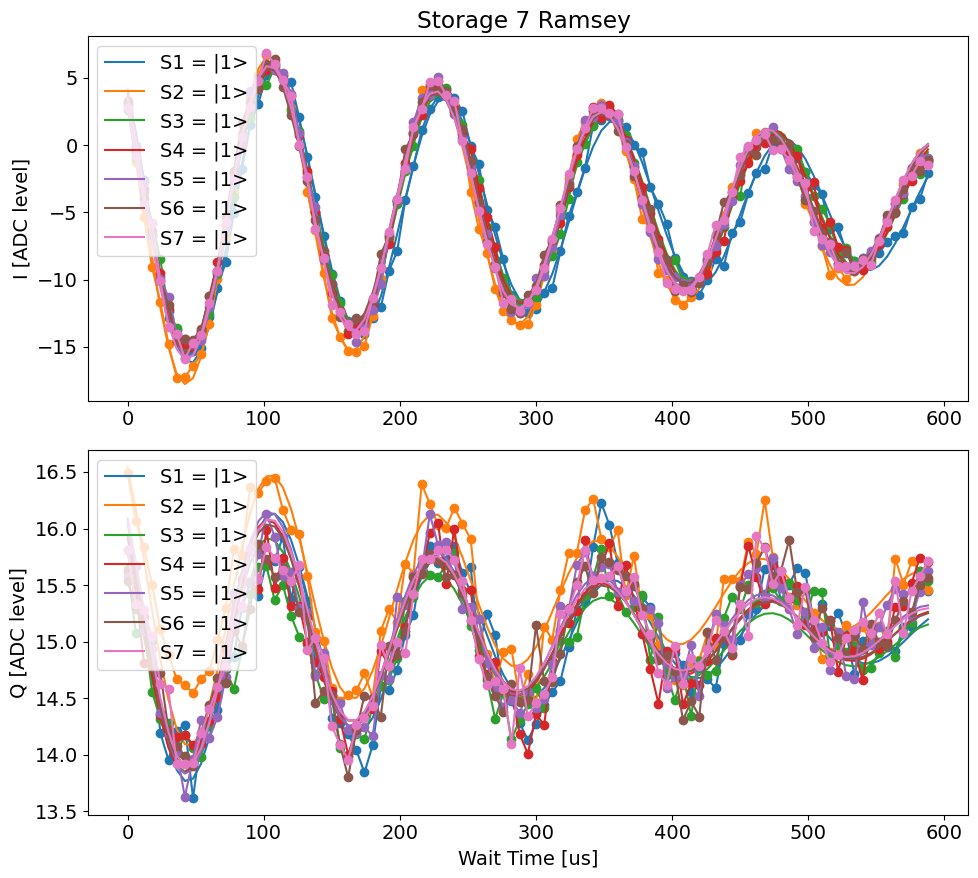

Processing mode 3 with original index 2
00073_cross_kerr_sweep.h5
Attempted to init fitparam 4 to -2.085974319415594, which is out of bounds 13.899589918781322 to 16.061622521348966. Instead init to 14.980606220065145
Attempted to init fitparam 4 to 14.980606220065145, which is out of bounds 16.683935822056963 to 22.1719405632832. Instead init to 19.427938192670084
Current pi pulse frequency: 4984.02431625832
Fit frequency from I [MHz]: 0.01078851216994111 +/- 8.650798348526422e-06
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.063527746151
 	4984.08510477049
T2 Ramsey from fit I [us]: 768.4144503708854
Fit frequency from Q [MHz]: 0.010892067539478523 +/- 0.0003133001965856648
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.063424190781
 	4984.08520832586
T2 Ramsey from fit Q [us]: 176.40000000000003
00074_cross_kerr_sweep.h5
Attempted to init fitparam 4 to 19.427938192670084, which is out of bounds -13.018750246713772 to 8.764937054773622. Instead init to -2.126

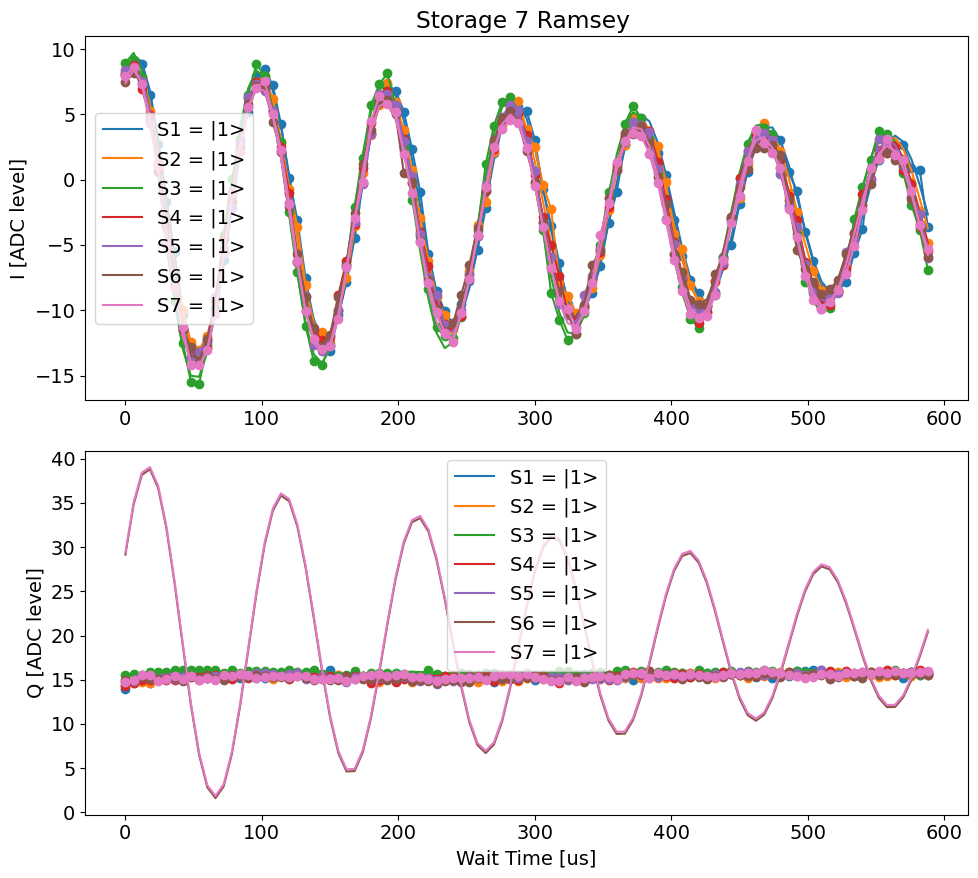

Processing mode 4 with original index 3
00080_cross_kerr_sweep.h5
Attempted to init fitparam 4 to -3.631209835382039, which is out of bounds 13.857942973523421 to 16.021000276319423. Instead init to 14.939471624921422
Attempted to init fitparam 4 to 14.939471624921422, which is out of bounds 16.814634799937295 to 22.538279509042052. Instead init to 19.676457154489675
Current pi pulse frequency: 4984.02431625832
Fit frequency from I [MHz]: 0.0064202913439895285 +/- 8.934235458467895e-06
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.067895966976
 	4984.080736549664
T2 Ramsey from fit I [us]: 800.7499323215334
Fit frequency from Q [MHz]: 0.01431621735557247 +/- 0.00030992081443294517
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.060000040965
 	4984.088632475676
T2 Ramsey from fit Q [us]: 176.40000000000003
00081_cross_kerr_sweep.h5
Attempted to init fitparam 4 to 19.676457154489675, which is out of bounds -13.251795727023229 to 6.785383937747762. Instead init to 

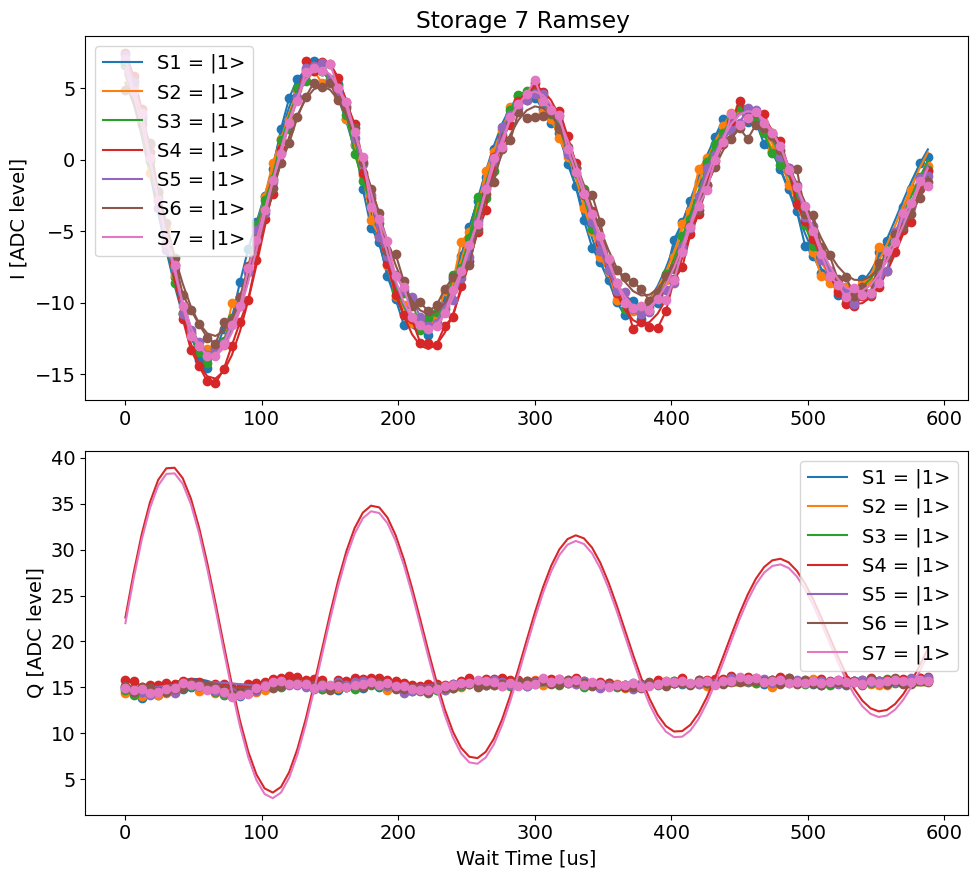

Processing mode 5 with original index 4
00087_cross_kerr_sweep.h5
Attempted to init fitparam 4 to -3.6588847722815325, which is out of bounds 14.477544117452375 to 16.123310565324807. Instead init to 15.300427341388591
Attempted to init fitparam 4 to 15.300427341388591, which is out of bounds 17.03015078111553 to 22.602976248033215. Instead init to 19.816563514574373
Current pi pulse frequency: 4984.02431625832
Fit frequency from I [MHz]: 0.009332719408154125 +/- 9.896357495710902e-06
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.064983538912
 	4984.083648977728
T2 Ramsey from fit I [us]: 583.674741537646
Fit frequency from Q [MHz]: 0.009381547146790866 +/- 0.0004483569628558856
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.064934711173
 	4984.083697805467
T2 Ramsey from fit Q [us]: 191.14548272824794
00088_cross_kerr_sweep.h5
Attempted to init fitparam 4 to 19.816563514574373, which is out of bounds -14.313384574609065 to 7.520595226903396. Instead init to -3

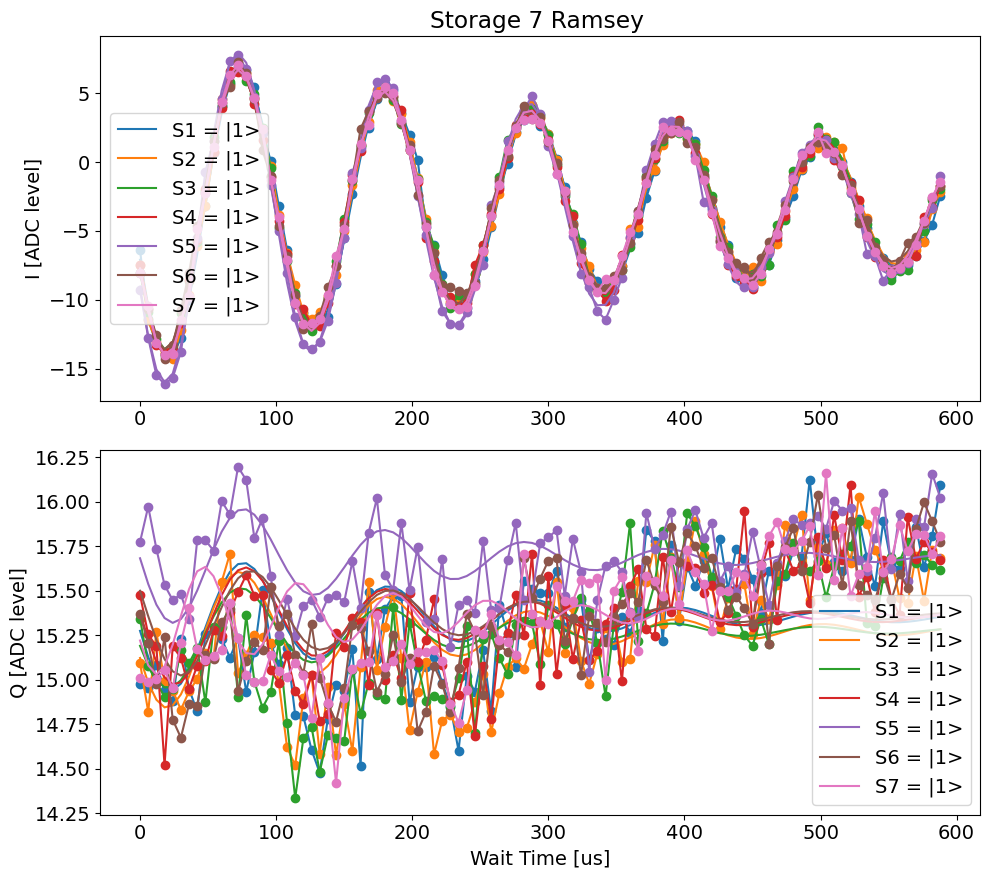

Processing mode 6 with original index 5
00094_cross_kerr_sweep.h5
Attempted to init fitparam 4 to -2.752164671318537, which is out of bounds 14.196250757356236 to 16.22776687051457. Instead init to 15.212008813935403
Attempted to init fitparam 4 to 15.212008813935403, which is out of bounds 16.270792355246154 to 21.591682659197986. Instead init to 18.93123750722207
Current pi pulse frequency: 4984.02431625832
Fit frequency from I [MHz]: 0.006613596986453638 +/- 1.3576030795174414e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.067702661334
 	4984.080929855307
T2 Ramsey from fit I [us]: 883.2547309934357
Fit frequency from Q [MHz]: 0.0008151128678440626 +/- 0.0002063219990003806
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.073501145453
 	4984.075131371188
T2 Ramsey from fit Q [us]: 205.80000000033183
00095_cross_kerr_sweep.h5
Attempted to init fitparam 4 to 18.93123750722207, which is out of bounds -12.462751606845293 to 8.071868753061413. Instead init to -2

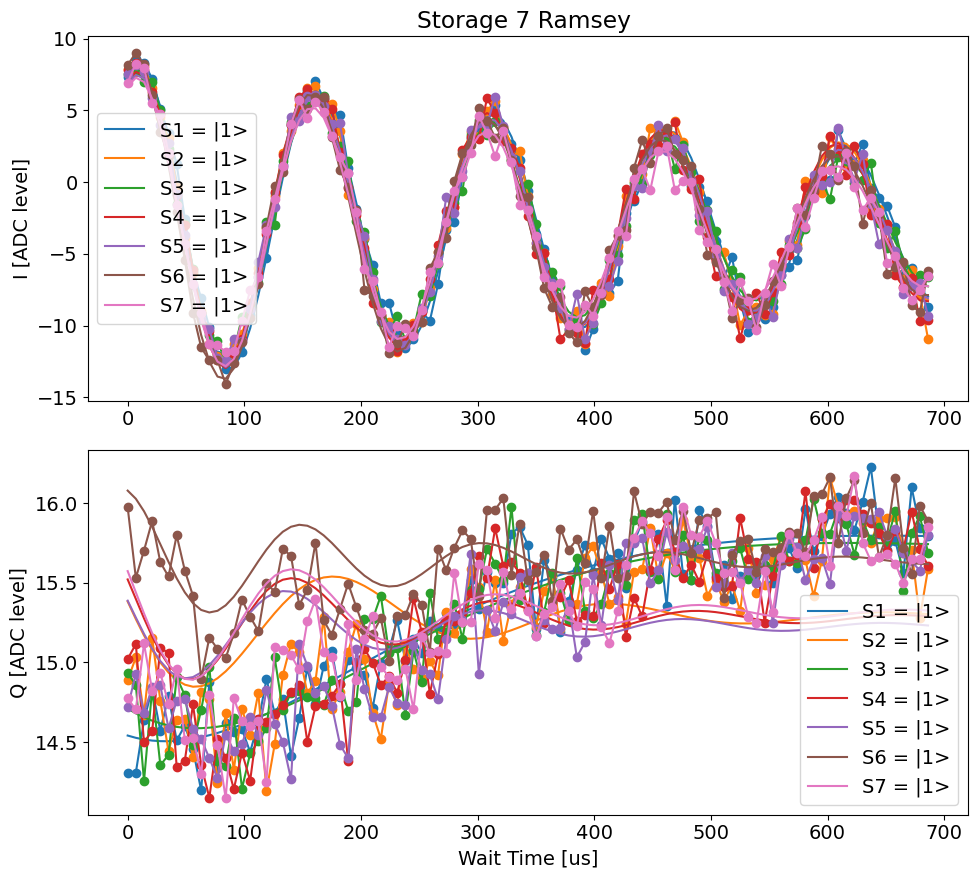

Processing mode 7 with original index 6
00101_cross_kerr_sweep.h5
Attempted to init fitparam 4 to -3.8086211313044407, which is out of bounds 14.118019151234162 to 16.007039566310084. Instead init to 15.062529358772123
Attempted to init fitparam 4 to 15.062529358772123, which is out of bounds 17.020407257116517 to 22.249783334100453. Instead init to 19.635095295608487
Current pi pulse frequency: 4984.02431625832
Fit frequency from I [MHz]: 0.007933129091488803 +/- 9.883441620761534e-06
Suggested new pi pulse frequency from fit I [MHz]:
 	4984.066383129229
 	4984.082249387412
T2 Ramsey from fit I [us]: 670.0434847341211
Fit frequency from Q [MHz]: 0.007997202037507962 +/- 0.00019888878807398079
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.066319056283
 	4984.082313460358
T2 Ramsey from fit Q [us]: 269.125425229273
00102_cross_kerr_sweep.h5
Attempted to init fitparam 4 to 19.635095295608487, which is out of bounds -14.272923847091356 to 6.172653798800588. Instead init to -

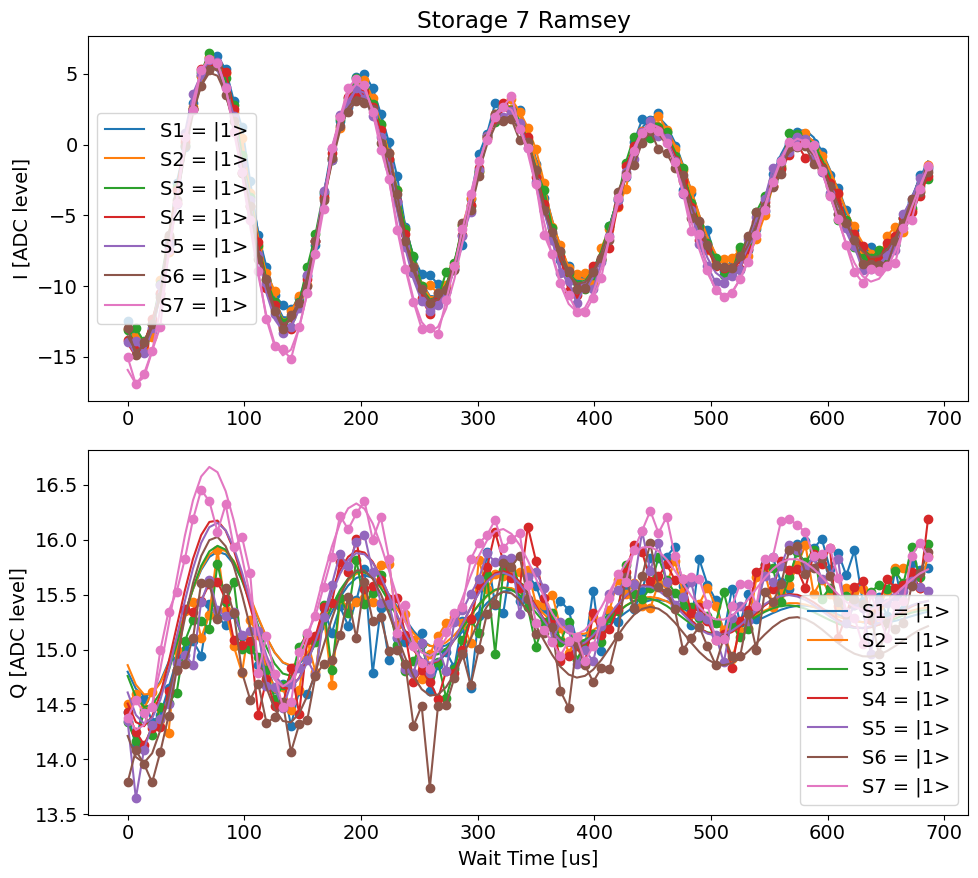

In [22]:
num_modes = 7
mode_list = [1, 2, 3, 4, 5, 6, 7]

cross_kerr_mat = np.zeros((num_modes, num_modes))
cross_kerr_err_mat = np.zeros((num_modes, num_modes))

for idx, mode_no in enumerate(mode_list):
    orig_idx = orig_idxs[idx]
    print(f'Processing mode {mode_no} with original index {orig_idx}')

    file_list = file_lists[idx]
    label_list =  [f'S1 = |1>',  f'S2 = |1>',  f'S3 = |1>', f'S4 = |1>', f'S5 = |1>', f'S6 = |1>', f'S7 = |1>']
    color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']#, 'tab:green']

    temp_data, attrs = prev_data(expt_path, '00066_CavityRamseyExperiment.h5') # just to get configs
    diffs, diffs_err = cross_kerr_display(expt_path, prev_data, file_list,  label_list, color_list, orig_idx = orig_idx, active_reset = True, threshold = -4.3, readouts_per_rep = 4,
                            ramsey_freq= attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True, 
                            fitparams = [20, None, None, None, None, None],
                            normalize= [False, 'g_data', 'e_data'], title='Storage 7 Ramsey')
    
    cross_kerr_mat[idx] = diffs
    cross_kerr_err_mat[idx] = diffs_err

In [23]:
#columns for dataframe
columns = {'target': np.concatenate(([[m] * num_modes for m in mode_list])), 'source': mode_list * num_modes, 'cross_kerr': cross_kerr_mat.flatten(), 'cross_kerr_err': cross_kerr_err_mat.flatten()}
df = pd.DataFrame(columns)
df

,target,source,cross_kerr,cross_kerr_err
0,1,1,0.000000e+00,0.000022
1,1,2,2.695166e-04,0.000024
2,1,3,1.264864e-04,0.000024
3,1,4,8.868452e-05,0.000025
4,1,5,4.269364e-05,0.000025
5,1,6,1.940413e-05,0.000025
6,1,7,-1.959562e-05,0.000027
7,2,1,-1.775436e-04,0.000011
8,2,2,0.000000e+00,0.000008
9,2,3,-6.922665e-05,0.000010


In [24]:
cross_kerr_mat

array([[ 0.00000000e+00,  2.69516637e-04,  1.26486438e-04,
         8.86845176e-05,  4.26936404e-05,  1.94041328e-05,
        -1.95956248e-05],
       [-1.77543592e-04,  0.00000000e+00, -6.92266452e-05,
        -7.10978126e-05,  1.37913777e-05, -2.56223707e-05,
         9.10903529e-07],
       [-7.56355942e-05, -4.42189013e-05,  0.00000000e+00,
        -2.45449305e-05, -4.28864355e-06,  2.24512793e-06,
        -3.33552244e-06],
       [ 6.10648017e-05,  4.56428583e-05,  1.96973208e-05,
         0.00000000e+00,  2.41548015e-06, -1.08904643e-05,
        -6.20592017e-06],
       [-3.72488668e-05, -4.62192947e-05, -3.77809419e-05,
        -1.58034621e-05,  0.00000000e+00, -2.52649638e-05,
        -2.20498490e-06],
       [-4.31597553e-05, -1.65832342e-05, -4.06943788e-05,
         1.21448311e-05, -1.92766876e-05,  0.00000000e+00,
         1.27297852e-05],
       [-5.42085347e-06, -3.00407857e-05, -7.10933782e-06,
        -2.45232181e-05,  8.53857371e-06, -1.07023464e-05,
         0.0000000

In [25]:
cross_kerr_err_mat

array([[2.19646983e-05, 2.41393547e-05, 2.44440720e-05, 2.51601129e-05,
        2.52388042e-05, 2.52973987e-05, 2.72364845e-05],
       [1.05654254e-05, 8.29864967e-06, 1.01238095e-05, 9.83818715e-06,
        9.97873680e-06, 1.03723199e-05, 1.01565265e-05],
       [8.65079835e-06, 1.01269991e-05, 7.36090240e-06, 7.85033768e-06,
        8.32563830e-06, 8.77969967e-06, 7.48635345e-06],
       [8.93423546e-06, 9.02314693e-06, 9.12695981e-06, 6.75331489e-06,
        8.79065434e-06, 9.83080858e-06, 7.82242301e-06],
       [9.89635750e-06, 9.01466277e-06, 9.02747919e-06, 8.87843044e-06,
        8.18835136e-06, 9.29222097e-06, 7.83356758e-06],
       [1.35760308e-05, 1.37773242e-05, 1.63056708e-05, 1.37112870e-05,
        1.53958703e-05, 1.54189492e-05, 1.74830549e-05],
       [9.88344162e-06, 9.14306062e-06, 9.59114024e-06, 8.50964972e-06,
        8.00871615e-06, 9.61036059e-06, 7.22940608e-06]])

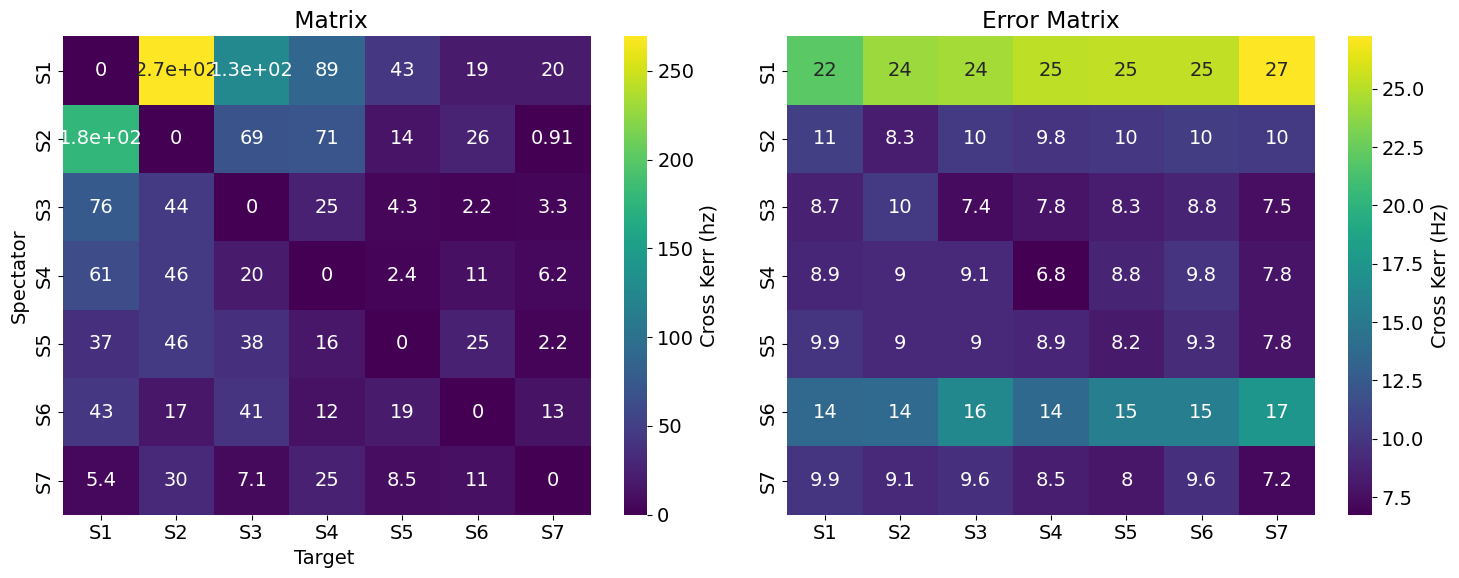

In [33]:
import seaborn as sns
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


# Plot t2s_mat
sns.heatmap(np.abs(np.round(cross_kerr_mat * 1e6, 3)), ax=ax1, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Cross Kerr (hz)'})
ax1.set_title(' Matrix')
ax1.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax1.set_xlabel('Target ')
ax1.set_ylabel('Spectator')

# Plot t2_errs_mat
sns.heatmap(np.round(cross_kerr_err_mat * 1e6, 2), ax=ax2, cmap='viridis', annot=True, cbar=True, cbar_kws={'label': 'Cross Kerr (Hz)'})
ax2.set_title('Error Matrix')
ax2.set_xticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
ax2.set_yticklabels(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])

# Display the plots
plt.tight_layout()
plt.show()

[[ 66,  67,  68,  69,  70,  71,  72],
       [108, 109, 110, 111, 112, 113, 114],
       [ 73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86],
       [ 87,  88,  89,  90,  91,  92,  93],
       [ 94,  95,  96,  97,  98,  99, 100],
       [101, 102, 103, 104, 105, 106, 107]]